In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0b8c6b35-2a90-4178-89a8-a763521bf58a ',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-19T07:13:01.406Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9227}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10166, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
  type(data)

dict

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df = pd.json_normalize(data['data'])

In [7]:
df['timestamp'] = pd.to_datetime('now')   
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935041e+07,1.935041e+07,False,NaN,1,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,30033.923172,1.913177e+10,12.0858,-0.661147,1.136472,0.238415,7.815859,22.190563,44.038998,5.811688e+11,45.8876,6.307124e+11,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
1,1027,Ethereum,ETH,ethereum,6740,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.193441e+08,1.193441e+08,False,NaN,2,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,2067.241766,8.769057e+09,-5.3479,-0.949673,-1.707065,10.524594,16.768083,22.049444,35.013771,2.467130e+11,19.4778,2.467130e+11,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
2,825,Tether,USDT,tether,51445,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.106127e+10,8.409174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,1.000295,3.131965e+10,1.6318,-0.002125,-0.016366,-0.047113,-0.294103,0.012402,0.030010,8.108517e+10,6.4026,8.411652e+10,NaN,2023-04-19T07:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 07:13:09.165767
3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558652e+08,1.558652e+08,False,NaN,4,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,336.466591,7.006688e+08,-11.8602,-1.394323,-2.464241,5.408326,0.317161,5.664020,15.729248,5.244342e+10,4.1408,5.244342e+10,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
4,3408,USD Coin,USDC,usd-coin,11881,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.137850e+10,3.137850e+10,False,NaN,5,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,0.999772,4.427285e+09,8.7678,-0.015770,-0.023786,0.005258,-0.017523,-0.006755,-0.025711,3.137134e+10,2.4771,3.137134e+10,NaN,2023-04-19T07:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 07:13:09.165767
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,0.524054,1.288378e+09,38.7509,-1.324195,1.647624,2.982966,36.920318,32.677211,36.226030,2.712023e+10,2.1411,5.240543e+10,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.478350e+10,3.569462e+10,False,NaN,7,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,0.434600,3.236354e+08,-25.4355,-0.848960,-1.851282,10.145805,26.988276,8.161399,30.684618,1.511690e+10,1.1937,1.955699e+10,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.389992e+11,1.389992e+11,False,NaN,8,NaN,NaN,NaN,2023-04-19T07:11:00.000Z,0.092681,7.372088e+08,-48.2310,-0.868013,-0.061411,13.030667,25.064778,5.554954,14.359993,1.288254e+10,1.0173,1.288254e+10,NaN,2023-04-19T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 07:13:09.165767
8,3890,Polygon,MATIC,polygon,662,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.2194

In [8]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0b8c6b35-2a90-4178-89a8-a763521bf58a ',
    }

    session = Session()
    session.headers.update(headers)

    try:
     response = session.get(url, params=parameters)
     data = json.loads(response.text)
#         print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')    
    df  
    
    
    if not os.path.isfile(r'C:\Users\patil\OneDrive\Desktop\Data sets\API Pull\CrypAPI.csv'):
        df.to_csv(r'C:\Users\patil\OneDrive\Desktop\Data sets\API Pull\CrypAPI.csv' , header='column_names')
    else:
        df.to_csv(r'C:\Users\patil\OneDrive\Desktop\Data sets\API Pull\CrypAPI.csv', mode ='a' , header=False)
        

In [17]:
import os 
from time import time 
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner Completed Scussesfully:',i)
    sleep(60)
exit()   

API Runner Completed Scussesfully: 0
API Runner Completed Scussesfully: 1
API Runner Completed Scussesfully: 2
API Runner Completed Scussesfully: 3


KeyboardInterrupt: 

In [9]:
df26 = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\Data sets\API Pull\CrypAPI.csv')
df26

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.934782e+07,1.934782e+07,False,NaN,1,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,30286.089290,1.150104e+10,-33.1887,-0.067006,-0.472551,8.383706,13.465715,33.615762,45.174847,5.859700e+11,46.0901,6.360079e+11,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
1,1,1027,Ethereum,ETH,ethereum,6730,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.197169e+08,1.197169e+08,False,NaN,2,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,2092.623485,6.906174e+09,-40.9957,0.125440,-0.540086,13.688050,19.849287,32.352859,35.386689,2.505224e+11,19.7209,2.505224e+11,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
2,2,825,Tether,USDT,tether,51300,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.092181e+10,8.409174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,1.000621,2.253854e+10,-31.2914,0.012957,-0.027650,0.005863,-0.186138,0.024075,0.025800,8.097206e+10,6.3740,8.414395e+10,NaN,2023-04-16T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-16 12:22:55.017020
3,3,1839,BNB,BNB,bnb,1263,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558658e+08,1.558658e+08,False,NaN,4,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,335.877810,7.070052e+08,-7.5004,0.180864,0.632940,8.121796,0.558207,10.840720,12.276902,5.235185e+10,4.1175,5.235185e+10,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
4,4,3408,USD Coin,USDC,usd-coin,11814,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.183242e+10,3.183242e+10,False,NaN,5,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.999779,3.447060e+09,-32.5696,0.020707,-0.009964,-0.017395,-0.020633,-0.025641,-0.027509,3.182540e+10,2.5054,3.182540e+10,NaN,2023-04-16T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-16 12:22:55.017020
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.519508,6.213932e+08,-38.0309,0.044148,-1.021657,3.072013,38.404450,34.073160,34.590805,2.688497e+10,2.1164,5.195081e+10,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.477747e+10,3.569462e+10,False,NaN,7,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.446317,4.687688e+08,-25.7013,0.215139,-2.412274,14.845389,29.769431,14.184651,27.489635,1.552176e+10,1.2219,2.008425e+10,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
7,7,74,Dogecoin,DOGE,dogecoin,686,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.389620e+11,1.389620e+11,False,NaN,8,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.089246,4.968749e+08,-32.3531,-0.165302,-0.602530,9.060320,18.940368,3.001886,5.959057,1.240178e+10,0.9763,1.240178e+10,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
8,8,3890,Polygon,MATIC,polygon,655,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'z

In [10]:
df26 = df26.drop(df26.columns[0], axis=1)  

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' %x )

In [12]:
df26  

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19347825.00000,19347825.00000,False,NaN,1,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,30286.08929,11501044020.27079,-33.18870,-0.06701,-0.47255,8.38371,13.46571,33.61576,45.17485,585969955514.88062,46.09010,636007875087.38000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
1,1027,Ethereum,ETH,ethereum,6730,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119716878.43507,119716878.43507,False,NaN,2,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,2092.62348,6906173828.07501,-40.99570,0.12544,-0.54009,13.68805,19.84929,32.35286,35.38669,250522351360.59039,19.72090,250522351360.59000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
2,825,Tether,USDT,tether,51300,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80921811951.79570,84091735571.84531,False,NaN,3,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,1.00062,22538536670.87300,-31.29140,0.01296,-0.02765,0.00586,-0.18614,0.02407,0.02580,80972062911.83235,6.37400,84143954996.27000,NaN,2023-04-16T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-16 12:22:55.017020
3,1839,BNB,BNB,bnb,1263,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865761.72949,155865761.72949,False,NaN,4,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,335.87781,707005182.69326,-7.50040,0.18086,0.63294,8.12180,0.55821,10.84072,12.27690,52351850645.75131,4.11750,52351850645.75000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
4,3408,USD Coin,USDC,usd-coin,11814,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31832417217.06184,31832417217.06184,False,NaN,5,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.99978,3447060434.47086,-32.56960,0.02071,-0.00996,-0.01740,-0.02063,-0.02564,-0.02751,31825395461.61058,2.50540,31825395461.61000,NaN,2023-04-16T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-16 12:22:55.017020
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.51951,621393238.07242,-38.03090,0.04415,-1.02166,3.07201,38.40445,34.07316,34.59081,26884966446.42429,2.11640,51950812460.81000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34777469634.08200,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.44632,468768760.84683,-25.70130,0.21514,-2.41227,14.84539,29.76943,14.18465,27.48964,15521762433.68748,1.22190,20084247556.40000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 12:22:55.017020
7,74,Dogecoin,DOGE,dogecoin,686,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138962026383.70526,138962026383.70526,False,NaN,8,NaN,NaN,NaN,2023-04-16T12:19:00.000Z,0.08925,496874919.06897,-32.35310,-0.16530,-0.60253,9.06032,18.94037,3.00189,5.95906,12401784130.19344,0.97630,12401784130.19000,NaN,2023-04-16T12:19:00.000Z,NaN,NaN,NaN

In [13]:
 df01 = df26.groupby('name' , sort=False)[['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
 df01

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.95234,6.80466,10.88710,27.04859,43.16075
Ethereum,-0.22003,12.97730,17.18012,27.82885,34.54609
Tether,-0.00607,-0.00705,-0.21563,0.01421,0.02271
BNB,1.53595,8.76554,0.04917,8.58135,13.11578
USD Coin,0.01788,-0.01750,-0.02465,-0.02296,-0.03466
XRP,-0.94808,2.49658,36.02066,31.07060,33.68175
Cardano,-1.69643,14.31249,27.33069,11.32350,26.47929
Dogecoin,2.29322,11.24676,19.94195,4.41850,9.25395
Polygon,-0.25483,6.03933,-4.68710,-12.25175,15.77989


In [14]:
df02 = df01.stack()
df02

name                                         
Bitcoin          quote.USD.percent_change_24h    -0.95234
                 quote.USD.percent_change_7d      6.80466
                 quote.USD.percent_change_30d    10.88710
                 quote.USD.percent_change_60d    27.04859
                 quote.USD.percent_change_90d    43.16075
Ethereum         quote.USD.percent_change_24h    -0.22003
                 quote.USD.percent_change_7d     12.97730
                 quote.USD.percent_change_30d    17.18012
                 quote.USD.percent_change_60d    27.82885
                 quote.USD.percent_change_90d    34.54609
Tether           quote.USD.percent_change_24h    -0.00607
                 quote.USD.percent_change_7d     -0.00705
                 quote.USD.percent_change_30d    -0.21563
                 quote.USD.percent_change_60d     0.01421
                 quote.USD.percent_change_90d     0.02271
BNB              quote.USD.percent_change_24h     1.53595
                 quote.USD

In [15]:
df03 = df02.to_frame(name='values')
df03

values
name                                                  
Bitcoin         quote.USD.percent_change_24h  -0.95234
                quote.USD.percent_change_7d    6.80466
                quote.USD.percent_change_30d  10.88710
                quote.USD.percent_change_60d  27.04859
                quote.USD.percent_change_90d  43.16075
Ethereum        quote.USD.percent_change_24h  -0.22003
                quote.USD.percent_change_7d   12.97730
                quote.USD.percent_change_30d  17.18012
                quote.USD.percent_change_60d  27.82885
                quote.USD.percent_change_90d  34.54609
Tether          quote.USD.percent_change_24h  -0.00607
                quote.USD.percent_change_7d   -0.00705
                quote.USD.percent_change_30d  -0.21563
                quote.USD.percent_change_60d   0.01421
                quote.USD.percent_change_90d   0.02271
BNB             quote.USD.percent_change_24h   1.53595
                quote.USD.percent_change_7d    8.76554
                quote.USD.percent_change_30d   0.04917
                quote.USD.percent_change_60d   8.58135
                quote.USD.percent_change_90d  13.11578
USD Coin        quote.USD.percent_change_24h   0.01788
                quote.USD.percent_change_7d   -0.01750
                quote.USD.percent_change_30d  -0.02465
                quote.USD.percent_change_60d  -0.02296
                quote.USD.percent_change_90d  -0.03466
XRP             quote.USD.percent_change_24h  -0.94808
                quote.USD.percent_change_7d    2.49658
                quote.USD.percent_change_30d  36.02066
                quote.USD.percent_change_60d  31.07060
                quote.USD.percent_change_90d  33.68175
Cardano         quote.USD.percent_change_24h  -1.69643
                quote.USD.percent_change_7d   14.31249
                quote.USD.percent_change_30d  27.33069
                quote.USD.percent_change_60d  11.32350
                quote.USD.percent_change_90d  26.47929
Dogecoin        quote.USD.percent_change_24h   2.29322
                quote.USD.percent_change_7d   11.24676
                quote.USD.percent_change_30d  19.94195
                quote.USD.percent_change_60d   4.41850
                quote.USD.percent_change_90d   9.25395
Polygon         quote.USD.percent_change_24h  -0.25483
                quote.USD.percent_change_7d    6.03933
                quote.USD.percent_change_30d  -4.68710
                quote.USD.percent_change_60d -12.25175
                quote.USD.percent_change_90d  15.77989
Solana          quote.USD.percent_change_24h   2.12684
                quote.USD.percent_change_7d   21.93766
                quote.USD.percent_change_30d  15.01632
                quote.USD.percent_change_60d   7.21564
                quote.USD.percent_change_90d   5.26208
Polkadot        quote.USD.percent_change_24h  -0.58092
                quote.USD.percent_change_7d    8.90113
                quote.USD.percent_change_30d   2.44915
                quote.USD.percent_change_60d   3.87740
                quote.USD.percent_change_90d  13.86633
Litecoin        quote.USD.percent_change_24h   1.55004
                quote.USD.percent_change_7d    8.40543
                quote.USD.percent_change_30d  14.88834
                quote.USD.percent_change_60d  -1.65021
                quote.USD.percent_change_90d  14.07905
Shiba Inu       quote.USD.percent_change_24h   1.60384
                quote.USD.percent_change_7d    5.90495
                quote.USD.percent_change_30d   4.19988
                quote.USD.percent_change_60d -13.90789
                quote.USD.percent_change_90d  10.59283
Binance USD     quote.USD.percent_change_24h   0.00507
                quote.USD.percent_change_7d    0.03573
                quote.USD.percent_change_30d  -0.05620
                quote.USD.percent_change_60d   0.03472
                quote.USD.percent_change_90d   0.01991
Avalanche       quote.USD.percent_change_24h   2.93180
                quote.USD.percent

In [50]:
df03.count()

values    100
dtype: int64

In [51]:
# index = pd.Index(range(100))

df04 = df03.reset_index()
df04 

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_24h,-0.95234
1,Bitcoin,quote.USD.percent_change_7d,6.80466
2,Bitcoin,quote.USD.percent_change_30d,10.88710
3,Bitcoin,quote.USD.percent_change_60d,27.04859
4,Bitcoin,quote.USD.percent_change_90d,43.16075
5,Ethereum,quote.USD.percent_change_24h,-0.22003
6,Ethereum,quote.USD.percent_change_7d,12.97730
7,Ethereum,quote.USD.percent_change_30d,17.18012
8,Ethereum,quote.USD.percent_change_60d,27.82885
9,Ethereum,quote.USD.percent_change_90d,34.54609


In [60]:
 df05 = df04.rename(columns={'level_1':'percent_change'})
df05

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_24h,-0.95234
1,Bitcoin,quote.USD.percent_change_7d,6.80466
2,Bitcoin,quote.USD.percent_change_30d,10.88710
3,Bitcoin,quote.USD.percent_change_60d,27.04859
4,Bitcoin,quote.USD.percent_change_90d,43.16075
5,Ethereum,quote.USD.percent_change_24h,-0.22003
6,Ethereum,quote.USD.percent_change_7d,12.97730
7,Ethereum,quote.USD.percent_change_30d,17.18012
8,Ethereum,quote.USD.percent_change_60d,27.82885
9,Ethereum,quote.USD.percent_change_90d,34.54609


In [63]:
df05['percent_change'] = df05['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])

In [64]:
df05

,name,percent_change,values
0,Bitcoin,24h,-0.95234
1,Bitcoin,7d,6.80466
2,Bitcoin,30d,10.88710
3,Bitcoin,60d,27.04859
4,Bitcoin,90d,43.16075
5,Ethereum,24h,-0.22003
6,Ethereum,7d,12.97730
7,Ethereum,30d,17.18012
8,Ethereum,60d,27.82885
9,Ethereum,90d,34.54609


In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt


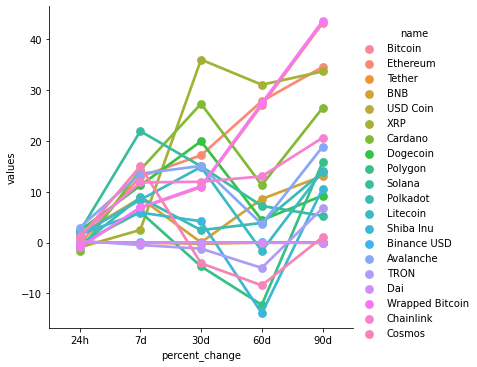

In [67]:
sns.catplot(x='percent_change', y='values', hue='name', data=df05, kind='point')

In [40]:
df06 = df26[['name','quote.USD.percent_change_24h','timestamp']]

df06

,name,quote.USD.percent_change_24h,timestamp
0,Bitcoin,-0.47255,2023-04-16 12:22:55.017020
1,Ethereum,-0.54009,2023-04-16 12:22:55.017020
2,Tether,-0.02765,2023-04-16 12:22:55.017020
3,BNB,0.63294,2023-04-16 12:22:55.017020
4,USD Coin,-0.00996,2023-04-16 12:22:55.017020
5,XRP,-1.02166,2023-04-16 12:22:55.017020
6,Cardano,-2.41227,2023-04-16 12:22:55.017020
7,Dogecoin,-0.60253,2023-04-16 12:22:55.017020
8,Polygon,-1.82028,2023-04-16 12:22:55.017020
9,Solana,-0.75647,2023-04-16 12:22:55.017020


In [45]:
 df06.query("name == 'Shiba inu'")


,name,quote.USD.percent_change_24h,timestamp


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.percent_change_24h'>

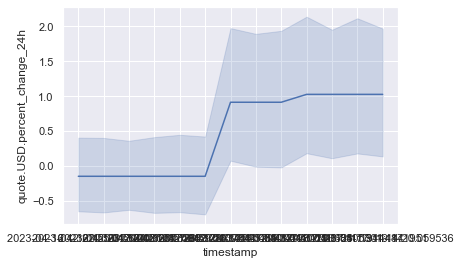

In [46]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp',y='quote.USD.percent_change_24h',  data = df06)
